In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données spatiales
import plotly.express as px

##Exploration du jeux de données

In [ ]:
#Importer CSV to dataframe

cyclables_nantes = pd.read_csv('cyclables_nantes.csv', sep=';')

In [ ]:
#Checker les types de champs

cyclables_nantes.dtypes

gid                   int64
geo_shape            object
voie                 object
commune              object
programme           float64
shape_length        float64
type_amenagement     object
double_sens          object
id_prestataire      float64
annee_reference     float64
pole_gestion         object
quartier             object
geo_point_2d         object
dtype: object

In [ ]:
cyclables_nantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gid               9724 non-null   int64  
 1   geo_shape         9724 non-null   object 
 2   voie              9075 non-null   object 
 3   commune           9724 non-null   object 
 4   programme         0 non-null      float64
 5   shape_length      9724 non-null   float64
 6   type_amenagement  9724 non-null   object 
 7   double_sens       9724 non-null   object 
 8   id_prestataire    9718 non-null   float64
 9   annee_reference   3 non-null      float64
 10  pole_gestion      9723 non-null   object 
 11  quartier          6756 non-null   object 
 12  geo_point_2d      9724 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 987.7+ KB


In [ ]:
#Compter le nombre d'enregistrements

cyclables_nantes['gid'].size

9724

Nantes                       4295
Saint-Herblain                727
Rezé                          702
Orvault                       504
Sainte-Luce-sur-Loire         414
Carquefou                     411
Couëron                       342
Bouguenais                    335
Saint-Sébastien-sur-Loire     319
Vertou                        316
La Chapelle-sur-Erdre         249
Les Sorinières                212
Basse-Goulaine                183
Bouaye                        156
Sautron                       111
Thouaré-sur-Loire              82
La Montagne                    76
Saint-Jean-de-Boiseau          64
Saint-Aignan-Grandlieu         62
Indre                          55
Le Pellerin                    54
Saint-Léger-les-Vignes         24
Mauves-sur-Loire               20
Brains                         11
Name: commune, dtype: int64


<Axes: >

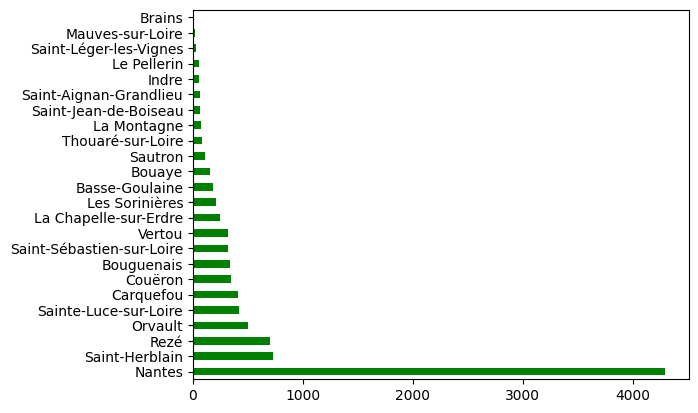

In [ ]:
# Conteo de vías por commune
count_by_commune = cyclables_nantes['commune'].value_counts()
print(count_by_commune)
count_by_commune.plot(kind="barh", color='green')

In [ ]:
cyclables_nantes.head()

,gid,geo_shape,voie,commune,programme,shape_length,type_amenagement,double_sens,id_prestataire,annee_reference,pole_gestion,quartier,geo_point_2d
0,100080,"{""coordinates"": [[-1.58872671004295, 47.187588...",RD 723,Bouguenais,NaN,41.660994,Piste cyclable,non,263404.0,NaN,Sud-Ouest,NaN,"47.18762068641529, -1.5884557453422599"
1,100077,"{""coordinates"": [[-1.5857101547706098, 47.1851...",Rue Pasteur,Bouguenais,NaN,62.465573,Bande cyclable,non,263401.0,NaN,Sud-Ouest,NaN,"47.1850513634349, -1.5861037832033815"
2,100069,"{""coordinates"": [[-1.59160331447772, 47.185794...",Rue de la Chabossière,Bouguenais,NaN,2.686484,Bande cyclable,non,263393.0,NaN,Sud-Ouest,NaN,"47.185797647975846, -1.59158617828192"
3,100064,"{""coordinates"": [[-1.59065145949908, 47.185978...",Rue de la Chabossière,Bouguenais,NaN,69.137897,Bande cyclable,non,263388.0,NaN,Sud-Ouest,NaN,"47.18592090951389, -1.591099645831589"
4,100059,"{""coordinates"": [[-1.59312954431609, 47.185464...",Rue Jules Ferry,Bouguenais,NaN,14.800076,Bande cyclable,non,263383.0,NaN,Sud-Ouest,NaN,"47.18553142276647, -1.5931109940434933"


In [ ]:
cyclables_nantes.isnull().sum()

gid                    0
geo_shape              0
voie                 649
commune                0
programme           9724
shape_length           0
type_amenagement       0
double_sens            0
id_prestataire         6
annee_reference     9721
pole_gestion           1
quartier            2968
geo_point_2d           0
dtype: int64

In [ ]:
#Réorganiser la table (sélection des colonnes importantes)

cyclables_nantes_ok = cyclables_nantes[["gid","geo_shape", "commune", "shape_length", "type_amenagement", "geo_point_2d"]]
cyclables_nantes_ok.head()

,gid,geo_shape,commune,shape_length,type_amenagement,geo_point_2d
0,100080,"{""coordinates"": [[-1.58872671004295, 47.187588...",Bouguenais,41.660994,Piste cyclable,"47.18762068641529, -1.5884557453422599"
1,100077,"{""coordinates"": [[-1.5857101547706098, 47.1851...",Bouguenais,62.465573,Bande cyclable,"47.1850513634349, -1.5861037832033815"
2,100069,"{""coordinates"": [[-1.59160331447772, 47.185794...",Bouguenais,2.686484,Bande cyclable,"47.185797647975846, -1.59158617828192"
3,100064,"{""coordinates"": [[-1.59065145949908, 47.185978...",Bouguenais,69.137897,Bande cyclable,"47.18592090951389, -1.591099645831589"
4,100059,"{""coordinates"": [[-1.59312954431609, 47.185464...",Bouguenais,14.800076,Bande cyclable,"47.18553142276647, -1.5931109940434933"


,gid
type_amenagement,
Cohabitation piéton-cycle,152
Chaucidou,338
Voie verte,353
Couloir Bus aménagé,379
Figurines,410
Autre,472
Piste cyclable bidirectionnelle,546
Piste cyclable,1526
Bande cyclable,5548


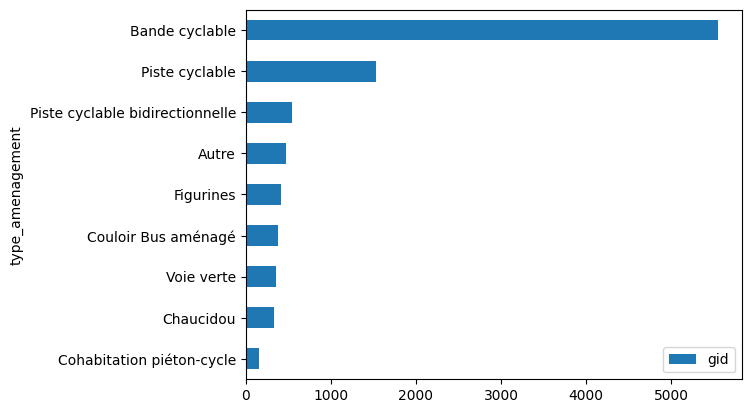

In [ ]:
# Regrouper les espaces verts par catégorie avec comptage (GROUP BY)

Categorie = cyclables_nantes_ok[["type_amenagement", "gid"]].groupby("type_amenagement").count()
Categorie = Categorie.sort_values("gid", ascending=True)
Categorie.plot(kind="barh")
Categorie.head(20)

In [ ]:
# Ne garder que les types principaux

Categorie10 = Categorie[(Categorie["gid"] >10)]
Categorie10.head(10)


,gid
type_amenagement,
Cohabitation piéton-cycle,152
Chaucidou,338
Voie verte,353
Couloir Bus aménagé,379
Figurines,410
Autre,472
Piste cyclable bidirectionnelle,546
Piste cyclable,1526
Bande cyclable,5548


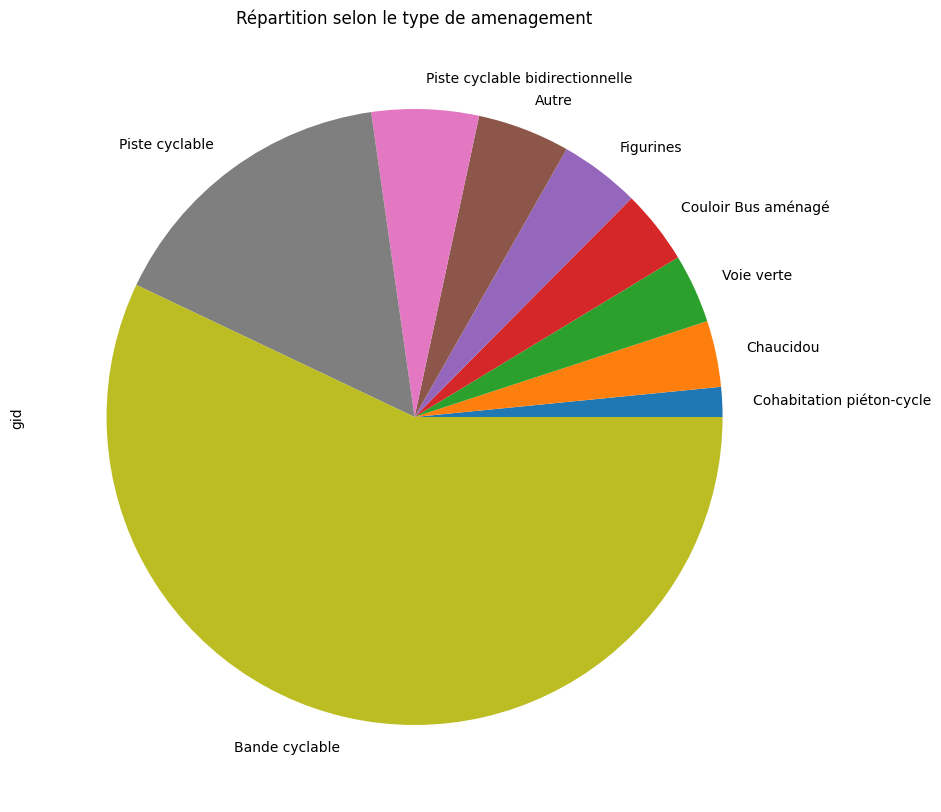

In [ ]:
# Diagramme circulaire des types d'espaces verts

Categorie10.plot.pie(y='gid', figsize=(10, 10), legend=False)
plt.title('Répartition selon le type de amenagement')
plt.show()

<Axes: xlabel='type_amenagement'>

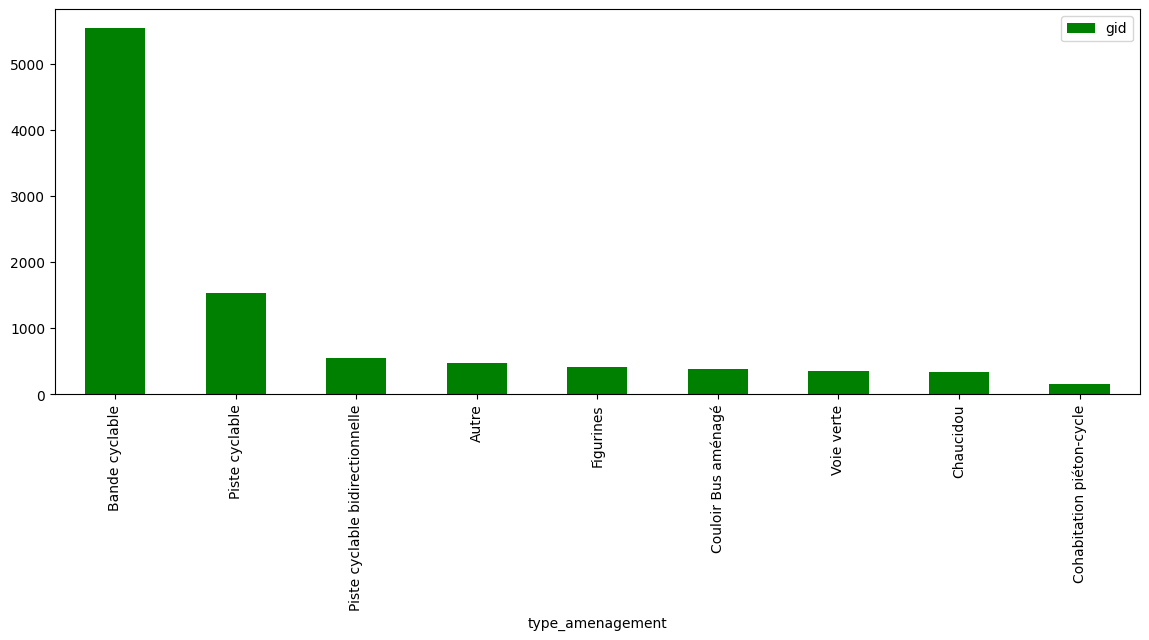

In [ ]:
Categorie10 = Categorie10.sort_values("gid", ascending=False)
Categorie10.plot(figsize =(14,5), kind="bar", color = "green")

In [ ]:
#Séparer la colonne des coordonnées géographiques

cyclables_nantes_ok[['Latitude','Longitude']] = cyclables_nantes_ok['geo_point_2d'].str.split(',', expand=True)
cyclables_nantes_ok.head()

<ipython-input-16-afc5b0a02cc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclables_nantes_ok[['Latitude','Longitude']] = cyclables_nantes_ok['geo_point_2d'].str.split(',', expand=True)
<ipython-input-16-afc5b0a02cc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclables_nantes_ok[['Latitude','Longitude']] = cyclables_nantes_ok['geo_point_2d'].str.split(',', expand=True)


,gid,geo_shape,commune,shape_length,type_amenagement,geo_point_2d,Latitude,Longitude
0,100080,"{""coordinates"": [[-1.58872671004295, 47.187588...",Bouguenais,41.660994,Piste cyclable,"47.18762068641529, -1.5884557453422599",47.18762068641529,-1.5884557453422599
1,100077,"{""coordinates"": [[-1.5857101547706098, 47.1851...",Bouguenais,62.465573,Bande cyclable,"47.1850513634349, -1.5861037832033815",47.1850513634349,-1.5861037832033815
2,100069,"{""coordinates"": [[-1.59160331447772, 47.185794...",Bouguenais,2.686484,Bande cyclable,"47.185797647975846, -1.59158617828192",47.185797647975846,-1.59158617828192
3,100064,"{""coordinates"": [[-1.59065145949908, 47.185978...",Bouguenais,69.137897,Bande cyclable,"47.18592090951389, -1.591099645831589",47.18592090951389,-1.591099645831589
4,100059,"{""coordinates"": [[-1.59312954431609, 47.185464...",Bouguenais,14.800076,Bande cyclable,"47.18553142276647, -1.5931109940434933",47.18553142276647,-1.5931109940434933


<Axes: >

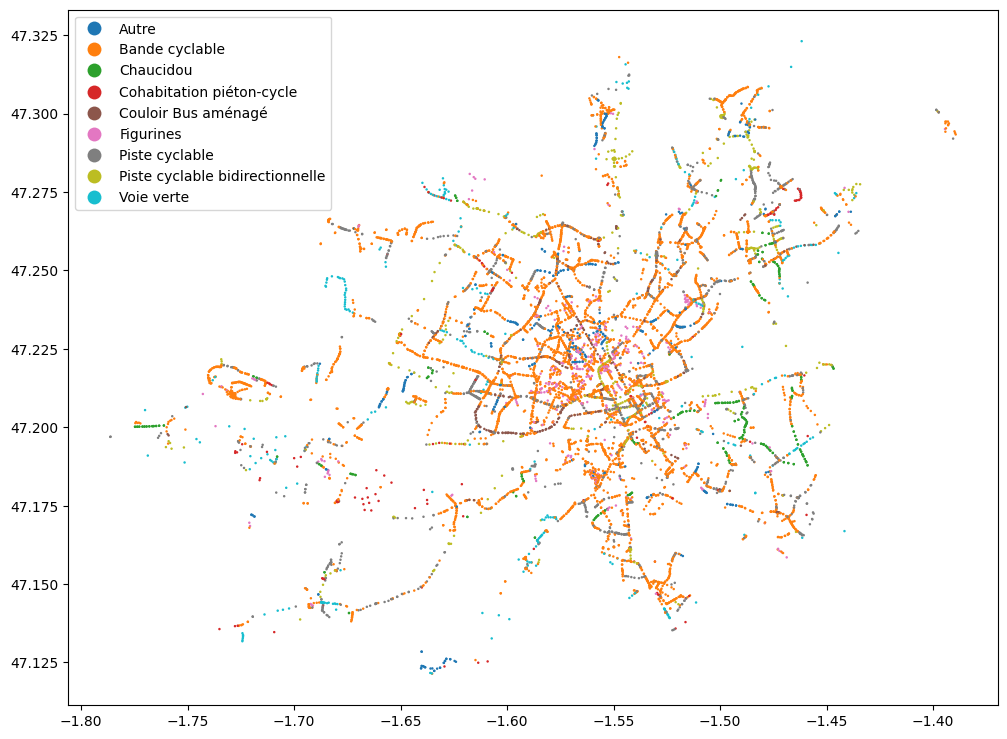

In [ ]:
#Dataframe to GeoDataframe

cyclable_geo = gpd.GeoDataFrame(cyclables_nantes_ok, crs = 'epsg:4326', geometry=gpd.points_from_xy(cyclables_nantes_ok.Longitude, cyclables_nantes_ok.Latitude))
cyclable_geo.plot(figsize=(12,12), markersize=0.6, column = "type_amenagement", legend = 'true')

<Axes: >

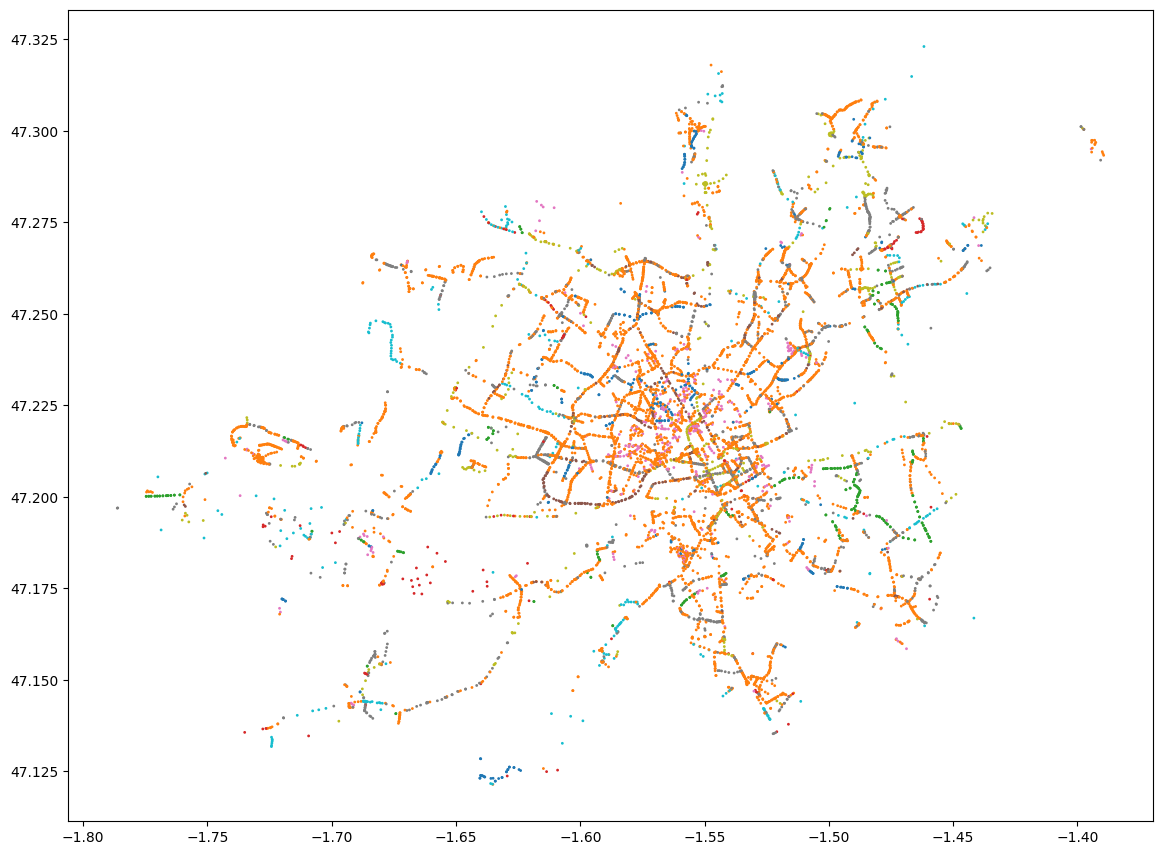

In [ ]:
#Dataframe to GeoDataframe

cyclable_geo = gpd.GeoDataFrame(cyclables_nantes_ok, crs = 'epsg:4326', geometry=gpd.points_from_xy(cyclables_nantes_ok.Longitude, cyclables_nantes_ok.Latitude))
cyclable_geo.plot(figsize=(14,12), markersize=1, column = "type_amenagement")

,gid,voie,commune,programme,shape_length,type_amenagement,double_sens,id_prestataire,annee_reference,pole_gestion,quartier,geo_point_2d,geometry
0,100080,RD 723,Bouguenais,NaN,41.660994,Piste cyclable,non,263404.0,NaN,Sud-Ouest,NaN,"{'lon': -1.5884557453422599, 'lat': 47.1876206...","LINESTRING (-1.58873 47.18759, -1.58862 47.187..."
1,100077,Rue Pasteur,Bouguenais,NaN,62.465573,Bande cyclable,non,263401.0,NaN,Sud-Ouest,NaN,"{'lon': -1.5861037832033815, 'lat': 47.1850513...","LINESTRING (-1.58571 47.18513, -1.58576 47.185..."
2,100069,Rue de la Chabossière,Bouguenais,NaN,2.686484,Bande cyclable,non,263393.0,NaN,Sud-Ouest,NaN,"{'lon': -1.59158617828192, 'lat': 47.185797647...","LINESTRING (-1.59160 47.18579, -1.59157 47.18580)"


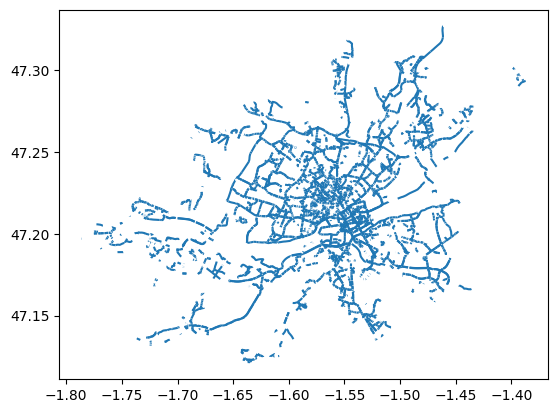

In [ ]:
#Importer la couche des pistes cyclables

pistescyclables= gpd.read_file("cyclables_geo.geojson", encoding='utf-8')
pistescyclables.plot()
pistescyclables.head(3)

In [ ]:
#Calculer la longueur (en metre) des tronçons des pistes cyclables

pistescyclables = pistescyclables.to_crs(2154)
pistescyclables["longueur"] = pistescyclables['geometry'].length
pistescyclables['longueur'] = round(pistescyclables['longueur'],0)
pistescyclables.head(3)

,gid,voie,commune,programme,shape_length,type_amenagement,double_sens,id_prestataire,annee_reference,pole_gestion,quartier,geo_point_2d,geometry,longueur
0,100080,RD 723,Bouguenais,NaN,41.660994,Piste cyclable,non,263404.0,NaN,Sud-Ouest,NaN,"{'lon': -1.5884557453422599, 'lat': 47.1876206...","LINESTRING (352725.113 6686460.209, 352733.054...",42.0
1,100077,Rue Pasteur,Bouguenais,NaN,62.465573,Bande cyclable,non,263401.0,NaN,Sud-Ouest,NaN,"{'lon': -1.5861037832033815, 'lat': 47.1850513...","LINESTRING (352937.303 6686174.395, 352933.685...",62.0
2,100069,Rue de la Chabossière,Bouguenais,NaN,2.686484,Bande cyclable,non,263393.0,NaN,Sud-Ouest,NaN,"{'lon': -1.59158617828192, 'lat': 47.185797647...","LINESTRING (352496.078 6686273.960, 352498.708...",3.0


<Axes: xlabel='longueur', ylabel='commune'>

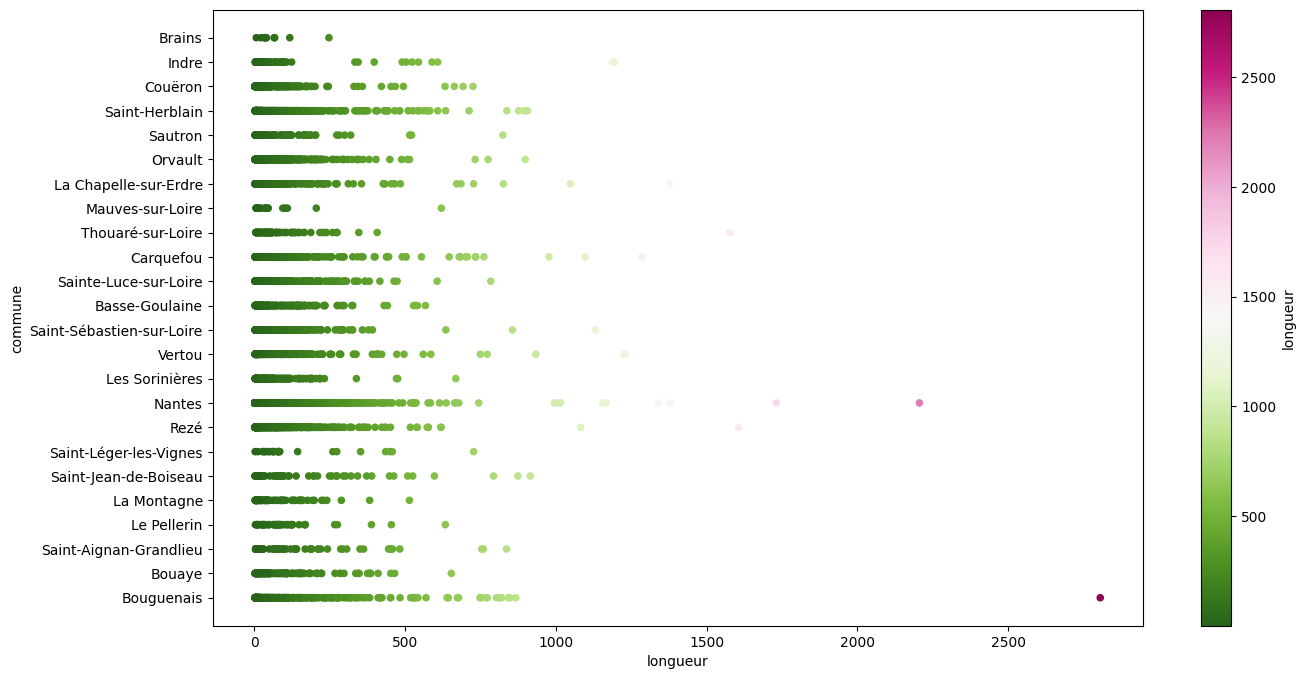

In [ ]:
# Explorer les données avec un nuage de points

pistescyclables.plot(figsize =(15,8), kind="scatter", x="longueur", y= "commune", c= "longueur", cmap='PiYG_r')

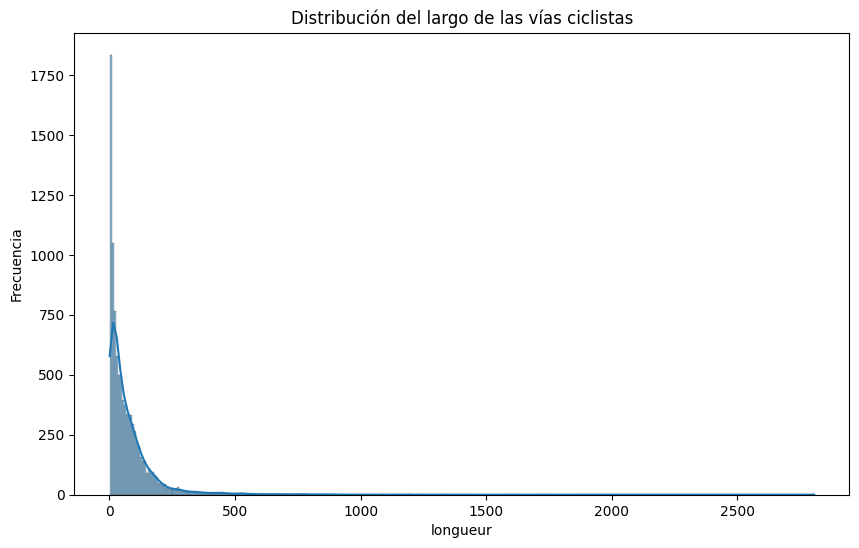

In [ ]:
# Histograma del largo de las vías
plt.figure(figsize=(10, 6))
sns.histplot(data=pistescyclables, x='longueur', kde=True)
plt.title('Distribución del largo de las vías ciclistas')
plt.xlabel('longueur')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear un histograma del largo de las vías ciclistas
fig = px.histogram(pistescyclables, x='longueur', nbins=30, title='Distribución del largo de las vías ciclistas')
fig.show()

In [ ]:
pistescyclables.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gid               9724 non-null   int64   
 1   voie              9075 non-null   object  
 2   commune           9724 non-null   object  
 3   programme         0 non-null      float64 
 4   shape_length      9724 non-null   float64 
 5   type_amenagement  9724 non-null   object  
 6   double_sens       9724 non-null   object  
 7   id_prestataire    9718 non-null   float64 
 8   annee_reference   3 non-null      float64 
 9   pole_gestion      9723 non-null   object  
 10  quartier          6756 non-null   object  
 11  geo_point_2d      9724 non-null   object  
 12  geometry          9724 non-null   geometry
 13  longueur          9724 non-null   float64 
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 1.0+ MB


In [ ]:
cyclables_nantes_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gid               9724 non-null   int64  
 1   geo_shape         9724 non-null   object 
 2   commune           9724 non-null   object 
 3   shape_length      9724 non-null   float64
 4   type_amenagement  9724 non-null   object 
 5   geo_point_2d      9724 non-null   object 
 6   Latitude          9724 non-null   object 
 7   Longitude         9724 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 607.9+ KB


In [ ]:
# Agrupar las vías ciclistas por tipo de vía y obtener el conteo
via_count = cyclables_nantes_ok.groupby('type_amenagement').size().reset_index(name='Quantite')
via_count

,type_amenagement,Quantite
0,Autre,472
1,Bande cyclable,5548
2,Chaucidou,338
3,Cohabitation piéton-cycle,152
4,Couloir Bus aménagé,379
5,Figurines,410
6,Piste cyclable,1526
7,Piste cyclable bidirectionnelle,546
8,Voie verte,353


In [ ]:
# Calcular la longitud total de las vías ciclistas por tipo de vía
via_length = cyclables_nantes_ok.groupby('type_amenagement')['shape_length'].sum().reset_index(name='Longitud total')
via_length

,type_amenagement,Longitud total
0,Autre,40008.414905
1,Bande cyclable,330414.913893
2,Chaucidou,30295.357771
3,Cohabitation piéton-cycle,21904.589886
4,Couloir Bus aménagé,29545.639434
5,Figurines,33801.095032
6,Piste cyclable,127527.879054
7,Piste cyclable bidirectionnelle,68509.524291
8,Voie verte,67561.902319


In [ ]:
#Convertir Shape_length a entero
cyclables_nantes_ok.shape_length = cyclables_nantes_ok.shape_length.astype(int)

<ipython-input-28-68cb5a3fe056>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Convertir Latitude a float64
cyclables_nantes_ok.Latitude = cyclables_nantes_ok.Latitude.astype(float)
cyclables_nantes_ok.Longitude = cyclables_nantes_ok.Longitude.astype(float)

<ipython-input-29-477807ce74e0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-477807ce74e0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_mapbox(cyclables_nantes_ok, lat='Latitude', lon='Longitude', hover_name='type_amenagement', hover_data=['shape_length'],
                        color='type_amenagement', zoom=10, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Ubicaciones de las vías ciclistas en Nantes')
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Histograma de longitudes de las vías ciclistas:
fig = go.Figure(data=[go.Histogram(x=cyclables_nantes_ok['shape_length'])])

fig.update_layout(title='Distribución de las longitudes de las vías ciclistas',
                  xaxis_title='Longitud', yaxis_title='Frecuencia')

fig.show()

In [ ]:
#Gráfico de barras de la longitud total de las vías ciclistas por tipo de vía:

fig = px.bar(via_length, x='type_amenagement', y='Longitud total',
             title='Longitud total de las vías ciclistas por tipo de vía', color='type_amenagement')

fig.update_layout(xaxis_title='Tipo de vía', yaxis_title='Longitud total')
fig.show()

In [ ]:
#Pregunta 1: ¿Cuántas vías ciclistas hay en cada municipio?

via_count_municipio = cyclables_nantes_ok.groupby('commune').size().reset_index(name='Cantidad')

fig = px.bar(via_count_municipio, x='commune', y='Cantidad',
             title='Combien y a-t-il de voies cyclables dans chaque municipalité ?')

fig.update_layout(xaxis_title='Commune', yaxis_title='Nombre de pistes cyclables')
fig.show()

In [ ]:
#Pregunta 2: ¿Cuál es la distribución de los tipos de vías ciclistas?


via_count_tipo = cyclables_nantes_ok['type_amenagement'].value_counts().reset_index()
via_count_tipo.columns = ['type_amenagement', 'Cantidad']

fig = px.pie(via_count_tipo, names='type_amenagement', values='Cantidad',
             title='Répartition des types de voies cyclables ?')

fig.show()

In [ ]:
#Pregunta 3: ¿Cuál es la longitud total de las vías ciclistas por municipio?

via_length_municipio = cyclables_nantes_ok.groupby('commune')['shape_length'].sum().reset_index(name='Longitud total')
fig = px.bar(via_length_municipio, x='commune', y='Longitud total',
             title='Longueur totale des voies cyclables par municipalité ?')

fig.update_layout(xaxis_title='Commune', yaxis_title='Longueur totale')
fig.show()


In [ ]:
via_length_municipio.head(24)

,commune,Longitud total
0,Basse-Goulaine,17694
1,Bouaye,14735
2,Bouguenais,43289
3,Brains,699
4,Carquefou,35656
5,Couëron,20986
6,Indre,8613
7,La Chapelle-sur-Erdre,22982
8,La Montagne,5696
9,Le Pellerin,5540


In [ ]:
#Pregunta 4: ¿Cuál es la longitud promedio de las vías ciclistas por tipo de vía?

via_avg_length_tipo = cyclables_nantes_ok.groupby('type_amenagement')['shape_length'].mean().reset_index(name='Longitud promedio')

fig = px.bar(via_avg_length_tipo, x='type_amenagement', y='Longitud promedio',
             title='Longueur moyenne des voies cyclables par type de voie ')

fig.update_layout(xaxis_title='Type Aménagement', yaxis_title='Longueur moyenne')
fig.show()


In [ ]:
#Pregunta 5: ¿Cuáles son las vías ciclistas más largas?

top_longest_vias = cyclables_nantes_ok.nlargest(10, 'shape_length')

fig = px.bar(top_longest_vias, x='shape_length', y='type_amenagement', orientation='h',
             title='Voies cyclables les plus longues par commune', color='commune')

fig.update_layout(xaxis_title='Longueur', yaxis_title='Type amenagement')
fig.show()


In [ ]:
#Pregunta 6: ¿Cuál es la longitud acumulada de las vías ciclistas por tipo de vía?

via_cumulative_length = cyclables_nantes_ok.groupby('type_amenagement')['shape_length'].sum().cumsum().reset_index(name='Longitud acumulada')

fig = px.area(via_cumulative_length, x='type_amenagement', y='Longitud acumulada',
              title='Longueur cumulée des voies cyclables par type de voie ')

fig.update_layout(xaxis_title='Type amenagement', yaxis_title='Longueur cumulée')
fig.show()


In [ ]:
#Pregunta 7: ¿Cuál es la distribución de las longitudes de las vías ciclistas?

#import plotly.graph_objects as go

fig = go.Figure(data=[go.Histogram(x=cyclables_nantes_ok['shape_length'])])

fig.update_layout(title='Distribution des longueurs des voies cyclables',
                  xaxis_title='Longueur', yaxis_title='Fréquence')

fig.show()


In [ ]:
#Pregunta 8: ¿Cuál es la longitud acumulada de las vías ciclistas por municipio?

via_cumulative_length_municipio = cyclables_nantes_ok.groupby('commune')['shape_length'].sum().cumsum().reset_index(name='Longitud acumulada')

fig = px.line(via_cumulative_length_municipio, x='commune', y='Longitud acumulada',
              title='Longueur cumulée des voies cyclables par commune')

fig.update_layout(xaxis_title='Commune', yaxis_title='Longueur cumulée')
fig.show()


In [ ]:
#Pregunta 9: ¿Cuáles son las vías ciclistas más comunes por municipio?

top_common_vias_municipio = cyclables_nantes_ok.groupby(['commune', 'type_amenagement']).size().reset_index(name='Cantidad')
top_common_vias_municipio = top_common_vias_municipio.sort_values(['commune', 'Cantidad'], ascending=[True, False])
top_common_vias_municipio = top_common_vias_municipio.groupby('commune').head(1)

fig = px.bar(top_common_vias_municipio, x='commune', y='Cantidad', color='type_amenagement',
             title='Voies cyclables les plus courantes par commune')

fig.update_layout(xaxis_title='Commune', yaxis_title='Nombre', legend_title='Type amenagement')
fig.show()


In [ ]:
#Pregunta 10: ¿Cuál es la distribución de las vías ciclistas en un mapa?

fig = px.scatter_mapbox(cyclables_nantes_ok, lat='Latitude', lon='Longitude', hover_name='type_amenagement', hover_data=['shape_length'],
                        color='type_amenagement', zoom=10, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Répartition géographique des voies cyclables à Nantes')
fig.show()


##DASH

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

<ipython-input-46-bbc1afbeb5a8>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-46-bbc1afbeb5a8>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
# Crea la aplicación Dash
app = dash.Dash(__name__)

In [ ]:
# Define el diseño de la aplicación
app.layout = html.Div(children=[
    html.H1('Dashboard de Vías Ciclistas en Nantes'),

    # Agrega las visualizaciones utilizando componentes dcc.Graph
    html.Div([
        dcc.Graph(
            id='grafico1',
            figure=px.bar(via_count_municipio, x='commune', y='Cantidad',
                          title='Cantidad de vías ciclistas por municipio')
        )
    ]),

    html.Div([
        dcc.Graph(
            id='grafico2',
            figure=px.pie(via_count_tipo, names='type_amenagement', values='Cantidad',
                          title='Distribución de los tipos de vías ciclistas')
        )
    ]),

    # Agrega más visualizaciones según sea necesario

])

In [ ]:
# Ejecuta la aplicación Dash
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>